In [35]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from bentdna import shapefourier
bentna_folder = '/home/yizaochen/codes/bentdna'

### Part 1: Initialize

In [2]:
workfolder = path.join(bentna_folder, 'tests')
host = 'pnas_16mer'
s_agent = shapefourier.ShapeAgent(workfolder, host)

### Part 2: Read $l_i$ and $\theta$

In [3]:
s_agent.read_l_modulus_theta()

In [4]:
s_agent.df.head(10)

,Frame_ID,i,j,|l_i|,|l_j|,theta
0,0,0,1,3.624648,2.808781,0.077684
1,0,0,2,3.624648,3.561358,0.147521
2,0,0,3,3.624648,3.352424,0.188460
3,0,0,4,3.624648,3.560380,0.182551
4,0,0,5,3.624648,3.403866,0.089722
5,0,0,6,3.624648,2.764086,0.069614
6,0,0,7,3.624648,3.467232,0.083026
7,0,0,8,3.624648,3.160709,0.186142
8,0,0,9,3.624648,2.749290,0.213325
9,0,0,10,3.624648,3.569155,0.105919


### Part 3: Filter function

In [62]:
def get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id):
    mask = (s_agent.df['i'] == bp_id_0)
    df0 = s_agent.df[mask]
    mask = (df0['Frame_ID'] == frame_id)
    df1 = df0[mask]
    mask = (df1['j'].between(bp_id_0+1, bp_id_last))
    df2 = df1[mask]
    return df2

def get_theta_s_list(df):
    l_norm_list = df['|l_j|'].tolist()
    theta_data = df['theta'].tolist()
    
    n_bp = df.shape[0] + 1
    theta_list = np.zeros(n_bp)
    s_list = np.zeros(n_bp)
    
    s = 0
    for i, l_norm in enumerate(l_norm_list):
        s += l_norm
        theta_list[i+1] = theta_data[i]
        s_list[i+1] = s
    return theta_list, s_list

def plot_theta_s(ax, s_list, theta_list, frame_id, lbfz, ttfz, xmin, xmax, ymin, ymax):
    ax.plot(s_list, np.rad2deg(theta_list), '-o')
    ax.set_ylabel(r'$\theta(s)~~(^o)$', fontsize=lbfz)
    ax.set_xlabel(r's ($\AA$)', fontsize=lbfz)
    ax.set_title(f'Frame {frame_id}', fontsize=ttfz)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return ax

### Part 4: Single Plot

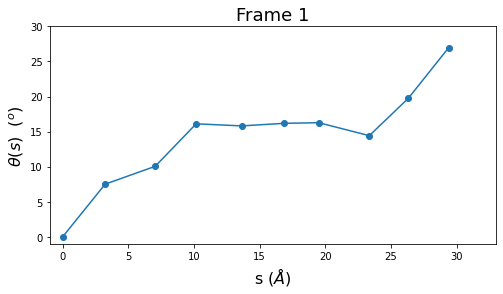

In [68]:
frame_id = 1
bp_id_0 = 3
bp_id_last = 12
lbfz = 16
ttfz = 18
xmin = -1
xmax = 33
ymin = -1
ymax = 30

df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
ax = plot_theta_s(ax, s_list, theta_list, frame_id, lbfz, ttfz, xmin, xmax, ymin, ymax)

plt.show()

### Part 5: Multiple Plots

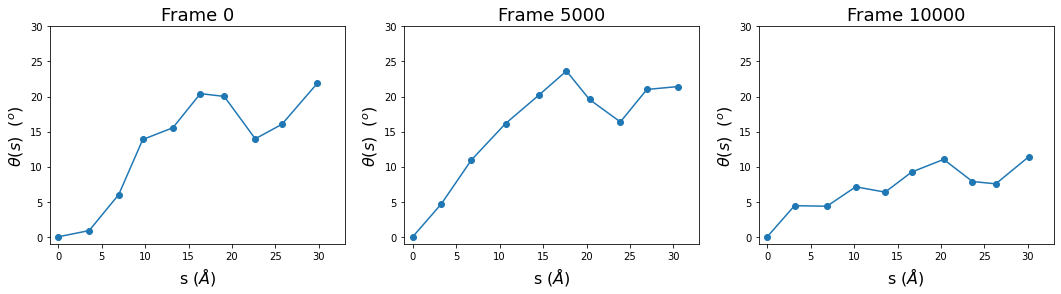

In [70]:
lbfz = 16
ttfz = 18
xmin = -1
xmax = 33
ymin = -1
ymax = 30
bp_id_0 = 3
bp_id_last = 12

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,4))

ax = axes[0]
frame_id = 0
df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)
ax = plot_theta_s(ax, s_list, theta_list, frame_id, lbfz, ttfz, xmin, xmax, ymin, ymax)

ax = axes[1]
frame_id = 5000
df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)
ax = plot_theta_s(ax, s_list, theta_list, frame_id, lbfz, ttfz, xmin, xmax, ymin, ymax)

ax = axes[2]
frame_id = 10000
df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)
ax = plot_theta_s(ax, s_list, theta_list, frame_id, lbfz, ttfz, xmin, xmax, ymin, ymax)

plt.savefig("three_frames.png", dpi=100)
plt.show()

### Additional Part 1: Find max($\theta$)

In [65]:
mask = (s_agent.df['i'] == bp_id_0)
df0 = s_agent.df[mask]
mask = (df0['j'].between(bp_id_0+1, bp_id_last))
df1 = df0[mask]
np.rad2deg(df0['theta'].max())

71.20854854093437